<a href="https://colab.research.google.com/github/Ambrish001/Flight_Price_Predictor/blob/main/Flight_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train (1).xlsx
Saving Test_set.xlsx to Test_set (1).xlsx


In [32]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Data_Train.xlsx']))
data.head

<bound method NDFrame.head of            Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0           IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1        Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2      Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3           IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4           IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302
...            ...             ...       ...  ...         ...             ...    ...
10678     Air Asia       9/04/2019   Kolkata  ...    non-stop         No info   4107
10679    Air India      27/04/2019   Kolkata  ...    non-stop         No info   4145
10680  Jet Airways      27/04/2019  Banglore  ...    non-stop         No info   7229
10681      Vistara      01/03/2019  Banglore  ...    non-stop         No info  12648
10682    Air India       9/05/2019 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [34]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [35]:
data.shape

(10683, 11)

In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [37]:
null_value_sum = data.isnull().sum()
null_value_sum

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [38]:
data.dropna(inplace=True)
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [39]:
data.drop_duplicates(keep='first',inplace=True)
data.shape

(10462, 11)

In [40]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [41]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [42]:
data['Departure_Day'] = data['Date_of_Journey'].dt.day 
data['Departure_Month'] = data['Date_of_Journey'].dt.month

#We are not making separate column for year as all data entries are of year 2019
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_Day,Departure_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [43]:
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_Day,Departure_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [44]:
data['Dep_Time_Hr'] = data['Dep_Time'].dt.hour
data['Dep_Time_Min'] = data['Dep_Time'].dt.minute
data['Arr_Time_Hr'] = data['Arrival_Time'].dt.hour
data['Arr_Time_Min'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [45]:
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))!=2 :
        if 'h' in duration[i]:
            duration[i]+=' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
data['Duration'] = duration
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-27 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [46]:
def ex_hour(hr):
    return hr.split(' ')[0][0:-1]
def ex_min(mi):
    return mi.split(' ')[1][0:-1]

data['Dur_Hr'] = data['Duration'].apply(ex_hour)
data['Dur_Min'] = data['Duration'].apply(ex_min)

data.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min,Dur_Hr,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-27 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [47]:
data['Dur_Hr'] = data['Dur_Hr'].astype(int)
data['Dur_Min'] = data['Dur_Min'].astype(int)
data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Departure_Day               int64
Departure_Month             int64
Dep_Time_Hr                 int64
Dep_Time_Min                int64
Arr_Time_Hr                 int64
Arr_Time_Min                int64
Dur_Hr                      int64
Dur_Min                     int64
dtype: object

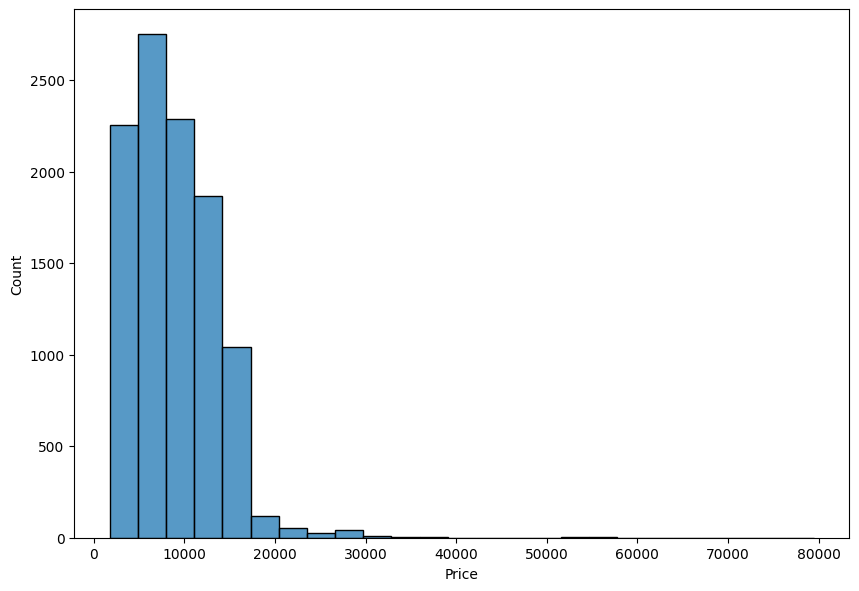

In [48]:
# Now we start data visualisation

# First, we visualize distribution of price for flights
plt.figure(figsize=(10,7),dpi=100)
sns.histplot(data=data,x='Price',bins=25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

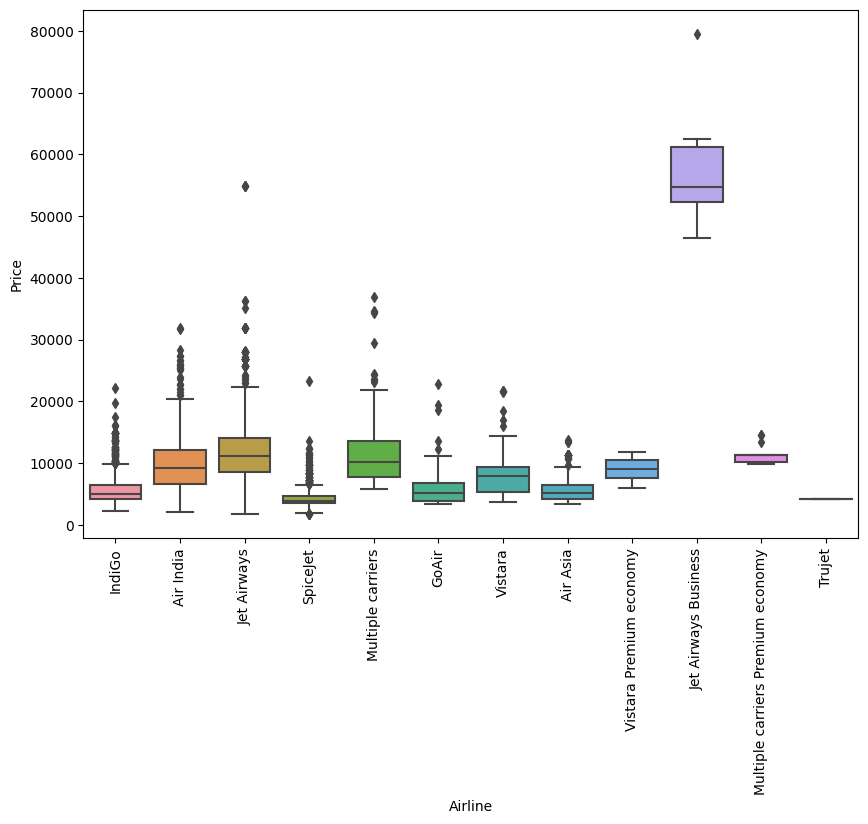

In [49]:
# Now we try to compare price of each airline
plt.figure(figsize=(10,7),dpi=100)
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90)

In [50]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(0.0, 4000.0)

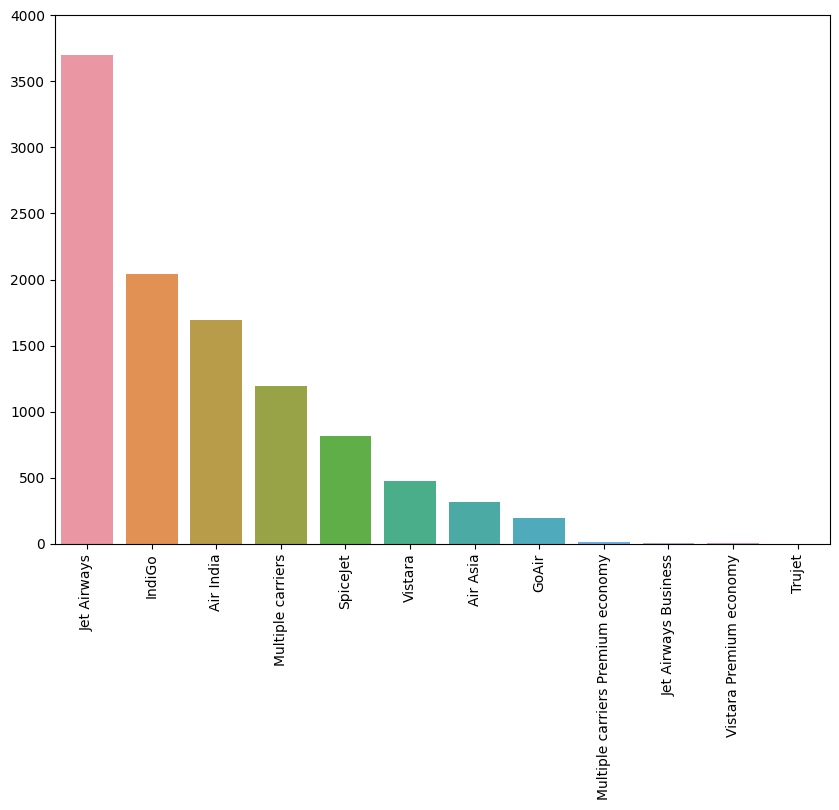

In [51]:
plt.figure(figsize=(10,7),dpi=100)
sns.barplot(x=data['Airline'].value_counts().index,y=data['Airline'].value_counts().values)
plt.xticks(rotation=90)
plt.ylim(0,4000)

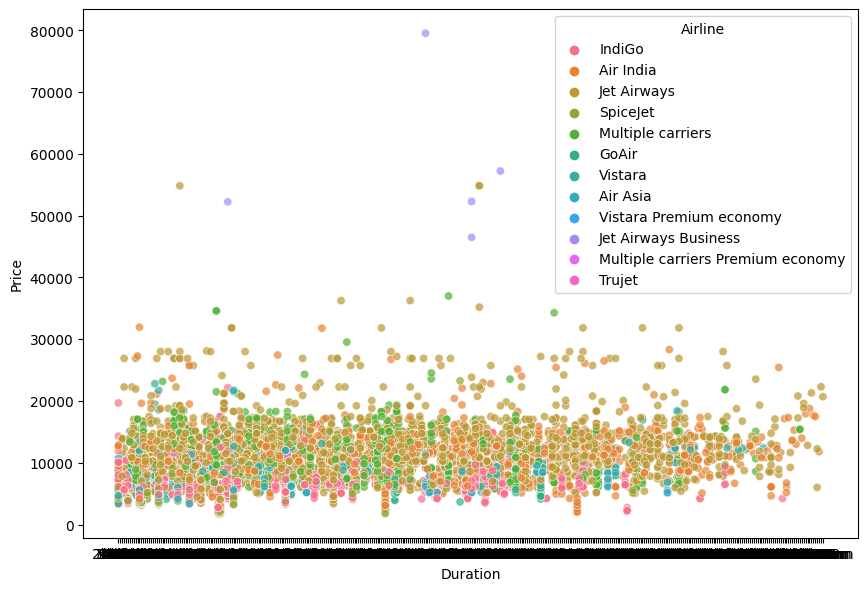

In [52]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x='Duration',y='Price',data=data,hue='Airline',alpha=0.7,legend='brief')

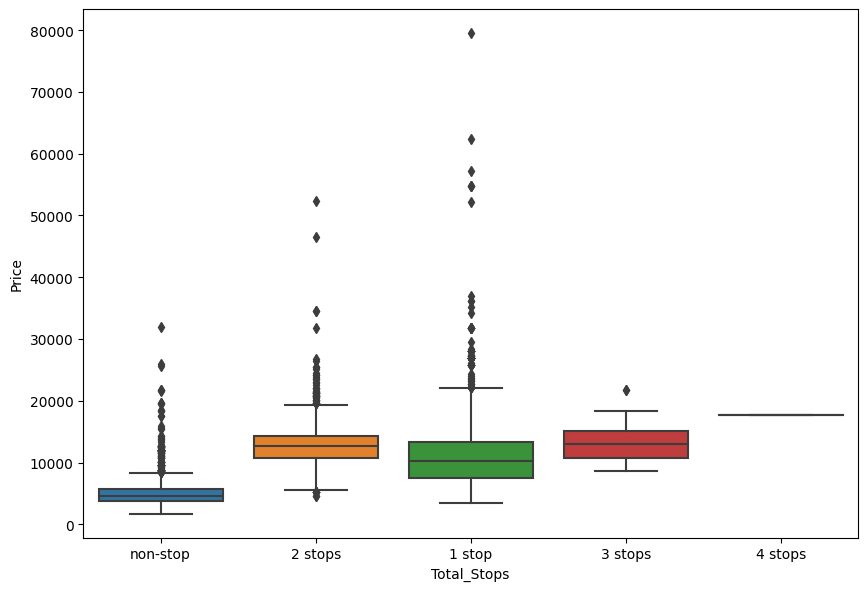

In [53]:
plt.figure(figsize=(10,7),dpi=100)
sns.boxplot(x='Total_Stops',y='Price',data=data)

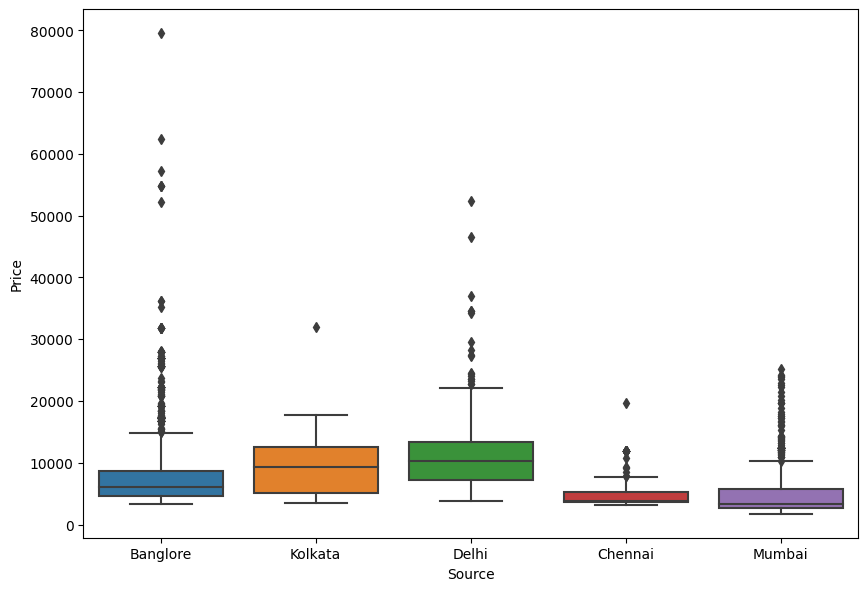

In [54]:
plt.figure(figsize=(10,7),dpi=100)
sns.boxplot(x='Source',y='Price',data=data)

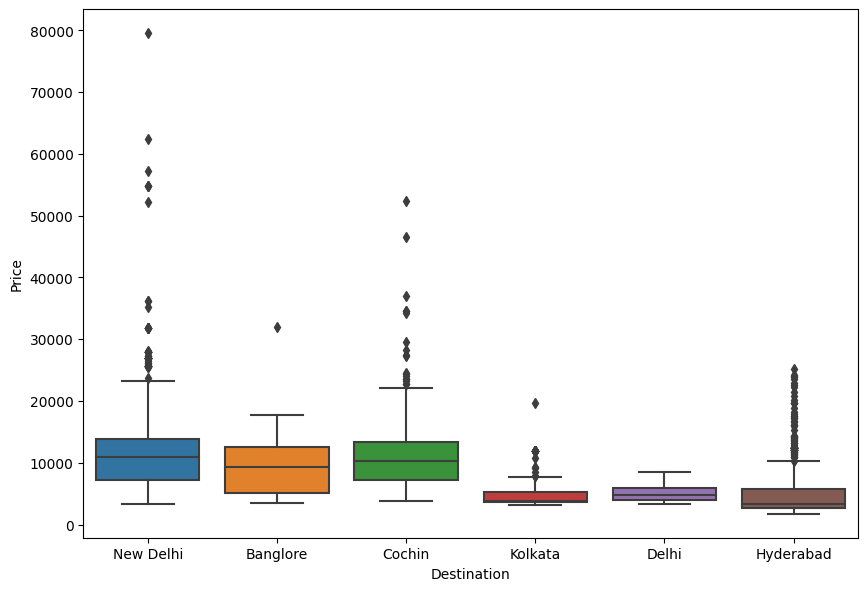

In [55]:
plt.figure(figsize=(10,7),dpi=100)
sns.boxplot(x='Destination',y='Price',data=data)

In [56]:
data.columns
data = data.rename(columns = {'Deaprture_Month':'Departure_Month'})
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Departure_Day',
       'Departure_Month', 'Dep_Time_Hr', 'Dep_Time_Min', 'Arr_Time_Hr',
       'Arr_Time_Min', 'Dur_Hr', 'Dur_Min'],
      dtype='object')

In [57]:
import plotly.express as px
px.scatter(data_frame=data,
                x= 'Price',
                y='Departure_Day',
                size='Departure_Month',
                color='Destination',
                title= 'Day Expand and Cost',
                labels= {'Price': 'Cost',
                         'Departure_Day': 'Day Expand'},
                log_x= True,
                range_y= [0,400],
                hover_name= 'Source',
                animation_frame='Price',
                height= 400,
                size_max=40)

In [58]:
data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → GOI → HYD                         1
CCU → IXA → BLR                         1
CCU → VTZ → BLR                         1
BOM → VNS → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
Name: Route, Length: 128, dtype: int64

In [59]:
data.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [60]:
'''
*** To be executed only once
'''
data.drop(['Route','Additional_Info'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min,Dur_Hr,Dur_Min
0,IndiGo,Banglore,New Delhi,2021-10-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2021-10-27 05:50:00,2021-10-27 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2021-10-27 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2021-10-27 18:05:00,2021-10-27 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2021-10-27 16:50:00,2021-10-27 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [61]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min,Dur_Hr,Dur_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [62]:
data.nunique()

Airline              12
Source                5
Destination           6
Duration            368
Total_Stops           5
Price              1870
Departure_Day         9
Departure_Month       7
Dep_Time_Hr          24
Dep_Time_Min         12
Arr_Time_Hr          24
Arr_Time_Min         12
Dur_Hr               44
Dur_Min              12
dtype: int64

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0
Departure_Day,10462.0,12.630090,8.791635,3.0,5.0,6.0,21.00,27.0
Departure_Month,10462.0,5.534601,2.995344,1.0,3.0,5.0,6.00,12.0
Dep_Time_Hr,10462.0,12.478494,5.727227,0.0,8.0,11.0,18.00,23.0
Dep_Time_Min,10462.0,24.404989,18.815719,0.0,5.0,25.0,40.00,55.0
Arr_Time_Hr,10462.0,13.387689,6.855547,0.0,8.0,14.0,19.00,23.0
Arr_Time_Min,10462.0,24.719939,16.570450,0.0,10.0,25.0,35.00,55.0
Dur_Hr,10462.0,10.026190,8.378023,0.0,2.0,8.0,15.00,47.0
Dur_Min,10462.0,28.210189,16.879185,0.0,15.0,30.0,45.00,55.0


In [65]:
data_copy = data.loc[:,["Airline","Source","Destination","Total_Stops","Departure_Day","Departure_Month",
                     "Dep_Time_Hr","Dep_Time_Min","Arr_Time_Hr","Arr_Time_Min","Price"]]
data_copy.head()                     

,Airline,Source,Destination,Total_Stops,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min,Price
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10,3897
1,Air India,Kolkata,Banglore,2 stops,5,1,5,50,13,15,7662
2,Jet Airways,Delhi,Cochin,2 stops,6,9,9,25,4,25,13882
3,IndiGo,Kolkata,Banglore,1 stop,5,12,18,5,23,30,6218
4,IndiGo,Banglore,New Delhi,1 stop,3,1,16,50,21,35,13302


In [66]:
X = data_copy.drop(columns=['Price'])
Y = data_copy['Price']
X.head()

,Airline,Source,Destination,Total_Stops,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,3,1,16,50,21,35


In [67]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [69]:
X.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Departure_Day       int64
Departure_Month     int64
Dep_Time_Hr         int64
Dep_Time_Min        int64
Arr_Time_Hr         int64
Arr_Time_Min        int64
dtype: object

In [71]:
num_col = X.select_dtypes(include='int64').columns.tolist()
num_col

['Departure_Day',
 'Departure_Month',
 'Dep_Time_Hr',
 'Dep_Time_Min',
 'Arr_Time_Hr',
 'Arr_Time_Min']

In [72]:
text_col = X.select_dtypes(include='object').columns.tolist()
text_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_copy[num_col])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
data_copy[num_col].describe().loc[['min','max']]

,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min
min,3.0,1.0,0.0,0.0,0.0,0.0
max,27.0,12.0,23.0,55.0,23.0,55.0


In [75]:
X[num_col] = scaler.transform(X[num_col])
X[num_col].describe()

,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.401254,0.412236,0.542543,0.443727,0.582073,0.449453
std,0.366318,0.272304,0.249010,0.342104,0.298067,0.301281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.181818,0.347826,0.090909,0.347826,0.181818
50%,0.125000,0.363636,0.478261,0.454545,0.608696,0.454545
75%,0.750000,0.454545,0.782609,0.727273,0.826087,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(data_copy[text_col])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [77]:
encoder.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
       dtype=object),
 array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
       dtype=object)]

In [78]:
encoded_cols = list(encoder.get_feature_names(text_col))
print(encoded_cols)

['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop']


In [79]:
X[encoded_cols] = encoder.transform(X[text_col])

In [81]:
X_train = X[num_col+text_col]
X_test = X[num_col+text_col]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [82]:
data_copy.corr()

,Departure_Day,Departure_Month,Dep_Time_Hr,Dep_Time_Min,Arr_Time_Hr,Arr_Time_Min,Price
Departure_Day,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622,-0.171142
Departure_Month,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619,0.008662
Dep_Time_Hr,-0.007617,0.028462,1.000000,-0.015068,-0.003827,0.072989,0.005155
Dep_Time_Min,-0.013512,0.001922,-0.015068,1.000000,0.046564,-0.021353,-0.024155
Arr_Time_Hr,-0.001133,-0.003041,-0.003827,0.046564,1.000000,-0.152036,0.031023
Arr_Time_Min,-0.019622,-0.023619,0.072989,-0.021353,-0.152036,1.000000,-0.086163
Price,-0.171142,0.008662,0.005155,-0.024155,0.031023,-0.086163,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

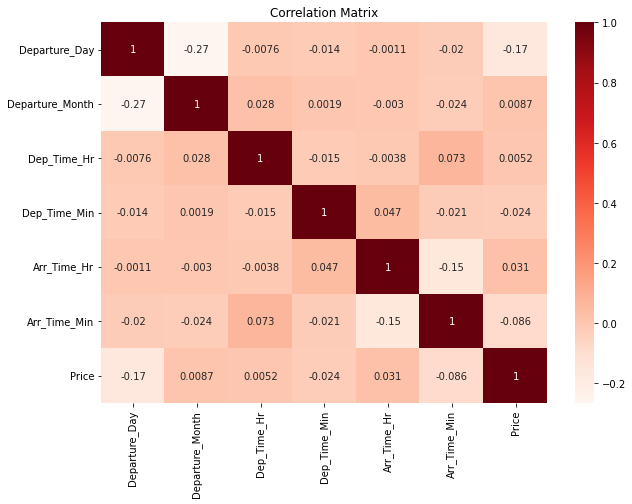

In [84]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(data_copy.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [106]:
X_train = X_train[num_col + encoded_cols]
X_test = X_test[num_col + encoded_cols]
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def predict(ML_Model):
  print('Model: {}'.format(ML_Model))
  model = ML_Model.fit(X_train,Y_train)
  print("Training Score is ",model.score(X_train,Y_train))
  predictions = model.predict(X_test)
  r2score=r2_score(Y_test,predictions) 
  print("r2 score is ", r2score)
        
  print('MAE is ',mean_absolute_error(Y_test,predictions))
  print('MSE is ',mean_squared_error(Y_test,predictions))
  print('RMSE is ',np.sqrt(mean_squared_error(Y_test,predictions)))
    
  sns.distplot(Y_test-predictions)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training Score is  0.6235294628530454
r2 score is  0.6027517888977039
MAE is  1967.0703004117004
MSE is  7800296.797795383
RMSE is  2792.9011435772986


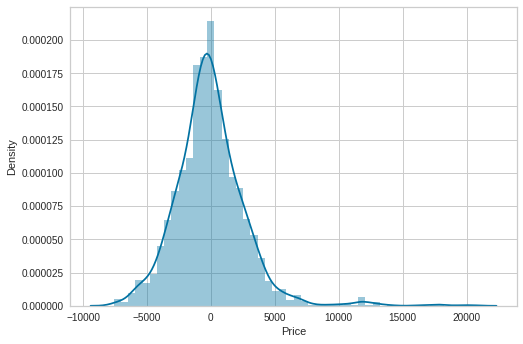

In [108]:
predict(LinearRegression())

Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Training Score is  0.9550094325144562
r2 score is  0.8163834206978626
MAE is  1194.8982191054022
MSE is  3605463.223052196
RMSE is  1898.8057359962331


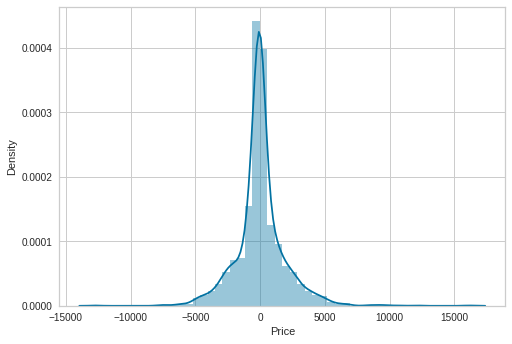

In [109]:
predict(RandomForestRegressor())

Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training Score is  0.0676792732660082
r2 score is  0.08269696876572741
MAE is  3295.575395414799
MSE is  18012002.8163
RMSE is  4244.054996851478


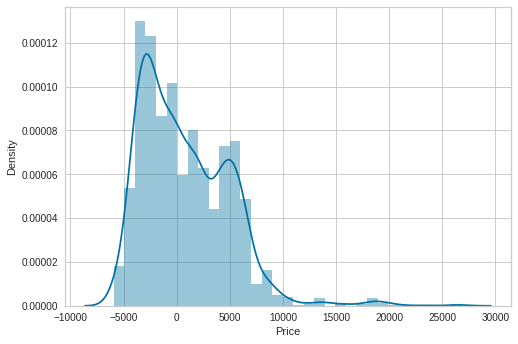

In [111]:
predict(SVR())

Model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Training Score is  0.8240669278631991
r2 score is  0.7412338518631323
MAE is  1521.8177735308168
MSE is  5081087.089326326
RMSE is  2254.1266799641776


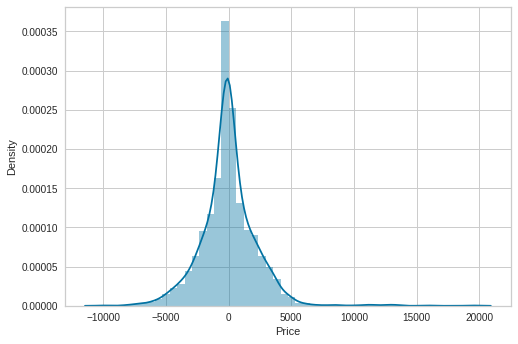

In [112]:
predict(KNeighborsRegressor())

Turns out that RandomForestRegressor has the highest r2 score and training score. This means that RandomForestRegressor is best among all above methods.